#### Loading the tree CSV data and show it

In [1]:
import pandas as pd
#load the data and show that we have correctly parsed the CSV
with open("Resources_Organized/Bestand3.csv") as file:
    data = pd.read_csv(file,sep=";")
data.head

<bound method NDFrame.head of       id                  x                 y               BHD
0      1  -68,2167006832299  61,3956239130436  56,1497142857143
1      2  -42,1984159281437  22,2948881437126  15,1288982035928
2      3  -35,6605485714286  48,7894283809524  34,5655619047619
3      4         -63,811228  60,6850993333333           32,0572
4      5  -12,3950435835351   77,242318062954  38,3888232445521
..   ...                ...               ...               ...
585  586  -36,9743130434783  38,8572591304348  28,9052173913044
586  587   -52,159067823765  38,5023822162884  40,0141842456609
587  588  -25,4799277966102  77,1735644067797  42,7526101694916
588  589  -8,60909308411215   75,078196728972  20,3729345794393
589  590  -26,3242885714286  59,0683546666667  46,8279238095239

[590 rows x 4 columns]>

##### Reading the TIF Data

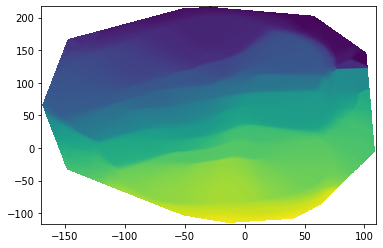

<AxesSubplot:>

In [8]:
import rasterio as rs
from rasterio.plot import show
import matplotlib

fp = r'Resources_Organized/Bestand3.tif'
bestand_tif = rs.open(fp)
show(bestand_tif, aspect='auto')

1


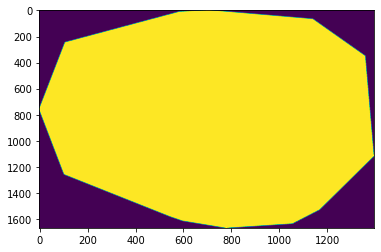

<AxesSubplot:>

In [16]:
# Read the band1 from the tif so we have array data
print(bestand_tif.count)
band1 = bestand_tif.read(1)
show(band1, aspect="auto")

In [27]:
import rioxarray
import geopandas as gpd
rds = rioxarray.open_rasterio("Resources_Organized/Bestand3.tif")
rds.name = "data"
bestand_3 = rds.squeeze().to_dataframe().reset_index()
#minify this for testing purposes
bestand_3 = bestand_3[1:10000]
geometry = gpd.points_from_xy(bestand_3.x, bestand_3.y)
gdf = gpd.GeoDataFrame(bestand_3, crs=rds.rio.crs, geometry=geometry)

AttributeError: 'PathCollection' object has no property 'lineheight'

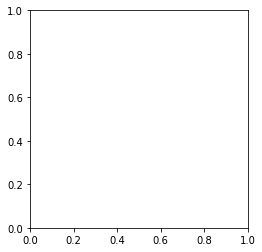

In [32]:
#gdf.head
gdf.plot(linewidth=400, lineheight=400)

In [46]:
# Convert tif to geometry

import rasterio
import rasterio.features
import rasterio.warp

geom_array=[]

with rasterio.open("Resources_Organized/Bestand3.tif") as dataset:

    # Read the dataset's valid data mask as a ndarray.
    mask = dataset.dataset_mask()


    # Extract feature shapes and values from the array.
    for geom, val in rasterio.features.shapes(
            mask, transform=dataset.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        # geom = rasterio.warp.transform_geom(
        #     dataset.crs, 'EPSG:4326', geom, precision=6)
        geom_array.append(geom)

forest = gpd.GeoDataFrame(geometry=geom_array[0])

/home/carlo/GitHub/MultiObjectOptimizationCableYarding/moo_env/lib/python3.10/site-packages/geopandas/geodataframe.py:1412: FutureWarning: Passing a dict as an indexer is deprecated and will raise in a future version. Use a list instead.
  result = super().__getitem__(key)


ValueError: Unknown column {'type': 'Polygon', 'coordinates': [[(-169.4, 217.2), (-169.4, 66.6), (-169.20000000000002, 66.6), (-169.20000000000002, 67.39999999999998), (-169.0, 67.39999999999998), (-169.0, 68.39999999999998), (-168.8, 68.39999999999998), (-168.8, 69.39999999999998), (-168.6, 69.39999999999998), (-168.6, 70.19999999999999), (-168.4, 70.19999999999999), (-168.4, 71.19999999999999), (-168.20000000000002, 71.19999999999999), (-168.20000000000002, 72.19999999999999), (-168.0, 72.19999999999999), (-168.0, 73.19999999999999), (-167.8, 73.19999999999999), (-167.8, 73.99999999999997), (-167.6, 73.99999999999997), (-167.6, 74.99999999999997), (-167.4, 74.99999999999997), (-167.4, 75.99999999999997), (-167.20000000000002, 75.99999999999997), (-167.20000000000002, 76.99999999999997), (-167.0, 76.99999999999997), (-167.0, 77.79999999999998), (-166.8, 77.79999999999998), (-166.8, 78.79999999999998), (-166.6, 78.79999999999998), (-166.6, 79.79999999999998), (-166.4, 79.79999999999998), (-166.4, 80.79999999999998), (-166.20000000000002, 80.79999999999998), (-166.20000000000002, 81.6), (-166.0, 81.6), (-166.0, 82.6), (-165.8, 82.6), (-165.8, 83.6), (-165.6, 83.6), (-165.6, 84.39999999999998), (-165.4, 84.39999999999998), (-165.4, 85.39999999999998), (-165.20000000000002, 85.39999999999998), (-165.20000000000002, 86.39999999999998), (-165.0, 86.39999999999998), (-165.0, 87.39999999999998), (-164.8, 87.39999999999998), (-164.8, 88.19999999999999), (-164.6, 88.19999999999999), (-164.6, 89.19999999999999), (-164.4, 89.19999999999999), (-164.4, 90.19999999999999), (-164.20000000000002, 90.19999999999999), (-164.20000000000002, 91.19999999999999), (-164.0, 91.19999999999999), (-164.0, 91.99999999999999), (-163.8, 91.99999999999999), (-163.8, 92.99999999999999), (-163.6, 92.99999999999999), (-163.6, 93.99999999999999), (-163.4, 93.99999999999999), (-163.4, 94.99999999999999), (-163.20000000000002, 94.99999999999999), (-163.20000000000002, 95.79999999999998), (-163.0, 95.79999999999998), (-163.0, 96.79999999999998), (-162.8, 96.79999999999998), (-162.8, 97.79999999999998), (-162.6, 97.79999999999998), (-162.6, 98.59999999999998), (-162.4, 98.59999999999998), (-162.4, 99.59999999999998), (-162.20000000000002, 99.59999999999998), (-162.20000000000002, 100.59999999999998), (-162.0, 100.59999999999998), (-162.0, 101.59999999999998), (-161.8, 101.59999999999998), (-161.8, 102.39999999999998), (-161.6, 102.39999999999998), (-161.6, 103.39999999999998), (-161.4, 103.39999999999998), (-161.4, 104.39999999999998), (-161.20000000000002, 104.39999999999998), (-161.20000000000002, 105.39999999999998), (-161.0, 105.39999999999998), (-161.0, 106.19999999999999), (-160.8, 106.19999999999999), (-160.8, 107.19999999999999), (-160.6, 107.19999999999999), (-160.6, 108.19999999999999), (-160.4, 108.19999999999999), (-160.4, 109.19999999999999), (-160.20000000000002, 109.19999999999999), (-160.20000000000002, 109.99999999999999), (-160.0, 109.99999999999999), (-160.0, 110.99999999999999), (-159.8, 110.99999999999999), (-159.8, 111.99999999999999), (-159.6, 111.99999999999999), (-159.6, 112.79999999999998), (-159.4, 112.79999999999998), (-159.4, 113.79999999999998), (-159.20000000000002, 113.79999999999998), (-159.20000000000002, 114.79999999999998), (-159.0, 114.79999999999998), (-159.0, 115.79999999999998), (-158.8, 115.79999999999998), (-158.8, 116.59999999999998), (-158.6, 116.59999999999998), (-158.6, 117.59999999999998), (-158.4, 117.59999999999998), (-158.4, 118.59999999999998), (-158.20000000000002, 118.59999999999998), (-158.20000000000002, 119.59999999999998), (-158.0, 119.59999999999998), (-158.0, 120.39999999999998), (-157.8, 120.39999999999998), (-157.8, 121.39999999999998), (-157.6, 121.39999999999998), (-157.6, 122.39999999999998), (-157.4, 122.39999999999998), (-157.4, 123.19999999999999), (-157.20000000000002, 123.19999999999999), (-157.20000000000002, 124.19999999999999), (-157.0, 124.19999999999999), (-157.0, 125.19999999999999), (-156.8, 125.19999999999999), (-156.8, 126.19999999999999), (-156.6, 126.19999999999999), (-156.6, 126.99999999999999), (-156.4, 126.99999999999999), (-156.4, 127.99999999999999), (-156.20000000000002, 127.99999999999999), (-156.20000000000002, 129.0), (-156.0, 129.0), (-156.0, 130.0), (-155.8, 130.0), (-155.8, 130.79999999999998), (-155.6, 130.79999999999998), (-155.6, 131.79999999999998), (-155.4, 131.79999999999998), (-155.4, 132.79999999999998), (-155.20000000000002, 132.79999999999998), (-155.20000000000002, 133.79999999999998), (-155.0, 133.79999999999998), (-155.0, 134.59999999999997), (-154.8, 134.59999999999997), (-154.8, 135.59999999999997), (-154.6, 135.59999999999997), (-154.6, 136.59999999999997), (-154.4, 136.59999999999997), (-154.4, 137.39999999999998), (-154.20000000000002, 137.39999999999998), (-154.20000000000002, 138.39999999999998), (-154.0, 138.39999999999998), (-154.0, 139.39999999999998), (-153.8, 139.39999999999998), (-153.8, 140.39999999999998), (-153.6, 140.39999999999998), (-153.6, 141.2), (-153.4, 141.2), (-153.4, 142.2), (-153.20000000000002, 142.2), (-153.20000000000002, 143.2), (-153.0, 143.2), (-153.0, 144.2), (-152.8, 144.2), (-152.8, 145.0), (-152.60000000000002, 145.0), (-152.60000000000002, 146.0), (-152.4, 146.0), (-152.4, 147.0), (-152.20000000000002, 147.0), (-152.20000000000002, 148.0), (-152.0, 148.0), (-152.0, 148.79999999999998), (-151.8, 148.79999999999998), (-151.8, 149.79999999999998), (-151.60000000000002, 149.79999999999998), (-151.60000000000002, 150.79999999999998), (-151.4, 150.79999999999998), (-151.4, 151.59999999999997), (-151.20000000000002, 151.59999999999997), (-151.20000000000002, 152.59999999999997), (-151.0, 152.59999999999997), (-151.0, 153.6), (-150.8, 153.6), (-150.8, 154.6), (-150.60000000000002, 154.6), (-150.60000000000002, 155.39999999999998), (-150.4, 155.39999999999998), (-150.4, 156.39999999999998), (-150.20000000000002, 156.39999999999998), (-150.20000000000002, 157.39999999999998), (-150.0, 157.39999999999998), (-150.0, 158.39999999999998), (-149.8, 158.39999999999998), (-149.8, 159.2), (-149.60000000000002, 159.2), (-149.60000000000002, 160.2), (-149.4, 160.2), (-149.4, 161.2), (-149.20000000000002, 161.2), (-149.20000000000002, 162.0), (-149.0, 162.0), (-149.0, 163.0), (-148.8, 163.0), (-148.8, 164.0), (-148.60000000000002, 164.0), (-148.60000000000002, 165.0), (-148.4, 165.0), (-148.4, 165.79999999999998), (-148.20000000000002, 165.79999999999998), (-148.20000000000002, 166.79999999999998), (-148.0, 166.79999999999998), (-148.0, 167.79999999999998), (-147.8, 167.79999999999998), (-147.8, 168.0), (-147.60000000000002, 168.0), (-147.60000000000002, 168.2), (-147.20000000000002, 168.2), (-147.20000000000002, 168.39999999999998), (-146.8, 168.39999999999998), (-146.8, 168.6), (-146.4, 168.6), (-146.4, 168.79999999999998), (-146.0, 168.79999999999998), (-146.0, 169.0), (-145.60000000000002, 169.0), (-145.60000000000002, 169.2), (-145.20000000000002, 169.2), (-145.20000000000002, 169.39999999999998), (-144.8, 169.39999999999998), (-144.8, 169.6), (-144.4, 169.6), (-144.4, 169.79999999999998), (-144.0, 169.79999999999998), (-144.0, 170.0), (-143.60000000000002, 170.0), (-143.60000000000002, 170.2), (-143.0, 170.2), (-143.0, 170.39999999999998), (-142.60000000000002, 170.39999999999998), (-142.60000000000002, 170.6), (-142.20000000000002, 170.6), (-142.20000000000002, 170.79999999999998), (-141.8, 170.79999999999998), (-141.8, 171.0), (-141.4, 171.0), (-141.4, 171.2), (-141.0, 171.2), (-141.0, 171.39999999999998), (-140.60000000000002, 171.39999999999998), (-140.60000000000002, 171.6), (-140.20000000000002, 171.6), (-140.20000000000002, 171.79999999999998), (-139.8, 171.79999999999998), (-139.8, 172.0), (-139.4, 172.0), (-139.4, 172.2), (-139.0, 172.2), (-139.0, 172.39999999999998), (-138.60000000000002, 172.39999999999998), (-138.60000000000002, 172.6), (-138.20000000000002, 172.6), (-138.20000000000002, 172.79999999999998), (-137.8, 172.79999999999998), (-137.8, 173.0), (-137.4, 173.0), (-137.4, 173.2), (-137.0, 173.2), (-137.0, 173.39999999999998), (-136.60000000000002, 173.39999999999998), (-136.60000000000002, 173.6), (-136.20000000000002, 173.6), (-136.20000000000002, 173.79999999999998), (-135.8, 173.79999999999998), (-135.8, 174.0), (-135.4, 174.0), (-135.4, 174.2), (-135.0, 174.2), (-135.0, 174.39999999999998), (-134.60000000000002, 174.39999999999998), (-134.60000000000002, 174.6), (-134.20000000000002, 174.6), (-134.20000000000002, 174.79999999999998), (-133.8, 174.79999999999998), (-133.8, 175.0), (-133.4, 175.0), (-133.4, 175.2), (-133.0, 175.2), (-133.0, 175.39999999999998), (-132.60000000000002, 175.39999999999998), (-132.60000000000002, 175.6), (-132.20000000000002, 175.6), (-132.20000000000002, 175.79999999999998), (-131.8, 175.79999999999998), (-131.8, 176.0), (-131.20000000000002, 176.0), (-131.20000000000002, 176.2), (-130.8, 176.2), (-130.8, 176.39999999999998), (-130.4, 176.39999999999998), (-130.4, 176.6), (-130.0, 176.6), (-130.0, 176.79999999999998), (-129.60000000000002, 176.79999999999998), (-129.60000000000002, 177.0), (-129.20000000000002, 177.0), (-129.20000000000002, 177.2), (-128.8, 177.2), (-128.8, 177.39999999999998), (-128.4, 177.39999999999998), (-128.4, 177.6), (-128.0, 177.6), (-128.0, 177.79999999999998), (-127.60000000000001, 177.79999999999998), (-127.60000000000001, 178.0), (-127.20000000000002, 178.0), (-127.20000000000002, 178.2), (-126.80000000000001, 178.2), (-126.80000000000001, 178.39999999999998), (-126.4, 178.39999999999998), (-126.4, 178.6), (-126.0, 178.6), (-126.0, 178.79999999999998), (-125.60000000000001, 178.79999999999998), (-125.60000000000001, 179.0), (-125.20000000000002, 179.0), (-125.20000000000002, 179.2), (-124.80000000000001, 179.2), (-124.80000000000001, 179.39999999999998), (-124.4, 179.39999999999998), (-124.4, 179.6), (-124.0, 179.6), (-124.0, 179.79999999999998), (-123.60000000000001, 179.79999999999998), (-123.60000000000001, 180.0), (-123.20000000000002, 180.0), (-123.20000000000002, 180.2), (-122.80000000000001, 180.2), (-122.80000000000001, 180.39999999999998), (-122.4, 180.39999999999998), (-122.4, 180.6), (-122.0, 180.6), (-122.0, 180.79999999999998), (-121.60000000000001, 180.79999999999998), (-121.60000000000001, 181.0), (-121.20000000000002, 181.0), (-121.20000000000002, 181.2), (-120.80000000000001, 181.2), (-120.80000000000001, 181.39999999999998), (-120.4, 181.39999999999998), (-120.4, 181.6), (-119.80000000000001, 181.6), (-119.80000000000001, 181.79999999999998), (-119.4, 181.79999999999998), (-119.4, 182.0), (-119.0, 182.0), (-119.0, 182.2), (-118.60000000000001, 182.2), (-118.60000000000001, 182.39999999999998), (-118.20000000000002, 182.39999999999998), (-118.20000000000002, 182.6), (-117.80000000000001, 182.6), (-117.80000000000001, 182.79999999999998), (-117.4, 182.79999999999998), (-117.4, 183.0), (-117.0, 183.0), (-117.0, 183.2), (-116.60000000000001, 183.2), (-116.60000000000001, 183.39999999999998), (-116.20000000000002, 183.39999999999998), (-116.20000000000002, 183.6), (-115.80000000000001, 183.6), (-115.80000000000001, 183.79999999999998), (-115.4, 183.79999999999998), (-115.4, 184.0), (-115.0, 184.0), (-115.0, 184.2), (-114.60000000000001, 184.2), (-114.60000000000001, 184.39999999999998), (-114.20000000000002, 184.39999999999998), (-114.20000000000002, 184.6), (-113.80000000000001, 184.6), (-113.80000000000001, 184.79999999999998), (-113.4, 184.79999999999998), (-113.4, 185.0), (-113.0, 185.0), (-113.0, 185.2), (-112.60000000000001, 185.2), (-112.60000000000001, 185.39999999999998), (-112.20000000000002, 185.39999999999998), (-112.20000000000002, 185.6), (-111.80000000000001, 185.6), (-111.80000000000001, 185.79999999999998), (-111.4, 185.79999999999998), (-111.4, 186.0), (-111.0, 186.0), (-111.0, 186.2), (-110.60000000000001, 186.2), (-110.60000000000001, 186.39999999999998), (-110.20000000000002, 186.39999999999998), (-110.20000000000002, 186.6), (-109.80000000000001, 186.6), (-109.80000000000001, 186.79999999999998), (-109.4, 186.79999999999998), (-109.4, 187.0), (-109.00000000000001, 187.0), (-109.00000000000001, 187.2), (-108.60000000000001, 187.2), (-108.60000000000001, 187.39999999999998), (-108.00000000000001, 187.39999999999998), (-108.00000000000001, 187.6), (-107.60000000000001, 187.6), (-107.60000000000001, 187.79999999999998), (-107.20000000000002, 187.79999999999998), (-107.20000000000002, 188.0), (-106.80000000000001, 188.0), (-106.80000000000001, 188.2), (-106.4, 188.2), (-106.4, 188.39999999999998), (-106.00000000000001, 188.39999999999998), (-106.00000000000001, 188.6), (-105.60000000000001, 188.6), (-105.60000000000001, 188.79999999999998), (-105.20000000000002, 188.79999999999998), (-105.20000000000002, 189.0), (-104.80000000000001, 189.0), (-104.80000000000001, 189.2), (-104.4, 189.2), (-104.4, 189.39999999999998), (-104.00000000000001, 189.39999999999998), (-104.00000000000001, 189.6), (-103.60000000000001, 189.6), (-103.60000000000001, 189.79999999999998), (-103.20000000000002, 189.79999999999998), (-103.20000000000002, 190.0), (-102.80000000000001, 190.0), (-102.80000000000001, 190.2), (-102.4, 190.2), (-102.4, 190.39999999999998), (-102.00000000000001, 190.39999999999998), (-102.00000000000001, 190.6), (-101.60000000000001, 190.6), (-101.60000000000001, 190.79999999999998), (-101.20000000000002, 190.79999999999998), (-101.20000000000002, 191.0), (-100.80000000000001, 191.0), (-100.80000000000001, 191.2), (-100.4, 191.2), (-100.4, 191.39999999999998), (-100.00000000000001, 191.39999999999998), (-100.00000000000001, 191.6), (-99.60000000000001, 191.6), (-99.60000000000001, 191.79999999999998), (-99.20000000000002, 191.79999999999998), (-99.20000000000002, 192.0), (-98.80000000000001, 192.0), (-98.80000000000001, 192.2), (-98.4, 192.2), (-98.4, 192.39999999999998), (-98.00000000000001, 192.39999999999998), (-98.00000000000001, 192.6), (-97.60000000000001, 192.6), (-97.60000000000001, 192.79999999999998), (-97.20000000000002, 192.79999999999998), (-97.20000000000002, 193.0), (-96.60000000000001, 193.0), (-96.60000000000001, 193.2), (-96.20000000000002, 193.2), (-96.20000000000002, 193.39999999999998), (-95.80000000000001, 193.39999999999998), (-95.80000000000001, 193.6), (-95.4, 193.6), (-95.4, 193.79999999999998), (-95.00000000000001, 193.79999999999998), (-95.00000000000001, 194.0), (-94.60000000000001, 194.0), (-94.60000000000001, 194.2), (-94.20000000000002, 194.2), (-94.20000000000002, 194.39999999999998), (-93.80000000000001, 194.39999999999998), (-93.80000000000001, 194.6), (-93.4, 194.6), (-93.4, 194.79999999999998), (-93.00000000000001, 194.79999999999998), (-93.00000000000001, 195.0), (-92.60000000000001, 195.0), (-92.60000000000001, 195.2), (-92.20000000000002, 195.2), (-92.20000000000002, 195.39999999999998), (-91.80000000000001, 195.39999999999998), (-91.80000000000001, 195.6), (-91.4, 195.6), (-91.4, 195.79999999999998), (-91.00000000000001, 195.79999999999998), (-91.00000000000001, 196.0), (-90.60000000000001, 196.0), (-90.60000000000001, 196.2), (-90.20000000000002, 196.2), (-90.20000000000002, 196.39999999999998), (-89.80000000000001, 196.39999999999998), (-89.80000000000001, 196.6), (-89.4, 196.6), (-89.4, 196.79999999999998), (-89.00000000000001, 196.79999999999998), (-89.00000000000001, 197.0), (-88.60000000000001, 197.0), (-88.60000000000001, 197.2), (-88.20000000000002, 197.2), (-88.20000000000002, 197.39999999999998), (-87.80000000000001, 197.39999999999998), (-87.80000000000001, 197.6), (-87.4, 197.6), (-87.4, 197.79999999999998), (-87.00000000000001, 197.79999999999998), (-87.00000000000001, 198.0), (-86.60000000000001, 198.0), (-86.60000000000001, 198.2), (-86.20000000000002, 198.2), (-86.20000000000002, 198.39999999999998), (-85.80000000000001, 198.39999999999998), (-85.80000000000001, 198.6), (-85.4, 198.6), (-85.4, 198.79999999999998), (-84.80000000000001, 198.79999999999998), (-84.80000000000001, 199.0), (-84.4, 199.0), (-84.4, 199.2), (-84.00000000000001, 199.2), (-84.00000000000001, 199.39999999999998), (-83.60000000000001, 199.39999999999998), (-83.60000000000001, 199.6), (-83.20000000000002, 199.6), (-83.20000000000002, 199.79999999999998), (-82.80000000000001, 199.79999999999998), (-82.80000000000001, 200.0), (-82.40000000000002, 200.0), (-82.40000000000002, 200.2), (-82.00000000000001, 200.2), (-82.00000000000001, 200.39999999999998), (-81.60000000000001, 200.39999999999998), (-81.60000000000001, 200.6), (-81.20000000000002, 200.6), (-81.20000000000002, 200.79999999999998), (-80.80000000000001, 200.79999999999998), (-80.80000000000001, 201.0), (-80.40000000000002, 201.0), (-80.40000000000002, 201.2), (-80.00000000000001, 201.2), (-80.00000000000001, 201.39999999999998), (-79.60000000000001, 201.39999999999998), (-79.60000000000001, 201.6), (-79.20000000000002, 201.6), (-79.20000000000002, 201.79999999999998), (-78.80000000000001, 201.79999999999998), (-78.80000000000001, 202.0), (-78.40000000000002, 202.0), (-78.40000000000002, 202.2), (-78.00000000000001, 202.2), (-78.00000000000001, 202.39999999999998), (-77.60000000000001, 202.39999999999998), (-77.60000000000001, 202.6), (-77.20000000000002, 202.6), (-77.20000000000002, 202.79999999999998), (-76.80000000000001, 202.79999999999998), (-76.80000000000001, 203.0), (-76.40000000000002, 203.0), (-76.40000000000002, 203.2), (-76.00000000000001, 203.2), (-76.00000000000001, 203.39999999999998), (-75.60000000000001, 203.39999999999998), (-75.60000000000001, 203.6), (-75.20000000000002, 203.6), (-75.20000000000002, 203.79999999999998), (-74.80000000000001, 203.79999999999998), (-74.80000000000001, 204.0), (-74.40000000000002, 204.0), (-74.40000000000002, 204.2), (-74.00000000000001, 204.2), (-74.00000000000001, 204.39999999999998), (-73.40000000000002, 204.39999999999998), (-73.40000000000002, 204.6), (-73.00000000000001, 204.6), (-73.00000000000001, 204.79999999999998), (-72.60000000000001, 204.79999999999998), (-72.60000000000001, 205.0), (-72.20000000000002, 205.0), (-72.20000000000002, 205.2), (-71.80000000000001, 205.2), (-71.80000000000001, 205.39999999999998), (-71.40000000000002, 205.39999999999998), (-71.40000000000002, 205.6), (-71.00000000000001, 205.6), (-71.00000000000001, 205.79999999999998), (-70.60000000000001, 205.79999999999998), (-70.60000000000001, 206.0), (-70.20000000000002, 206.0), (-70.20000000000002, 206.2), (-69.80000000000001, 206.2), (-69.80000000000001, 206.39999999999998), (-69.40000000000002, 206.39999999999998), (-69.40000000000002, 206.6), (-69.00000000000001, 206.6), (-69.00000000000001, 206.79999999999998), (-68.60000000000001, 206.79999999999998), (-68.60000000000001, 207.0), (-68.20000000000002, 207.0), (-68.20000000000002, 207.2), (-67.80000000000001, 207.2), (-67.80000000000001, 207.39999999999998), (-67.40000000000002, 207.39999999999998), (-67.40000000000002, 207.6), (-67.00000000000001, 207.6), (-67.00000000000001, 207.79999999999998), (-66.60000000000001, 207.79999999999998), (-66.60000000000001, 208.0), (-66.20000000000002, 208.0), (-66.20000000000002, 208.2), (-65.80000000000001, 208.2), (-65.80000000000001, 208.39999999999998), (-65.40000000000002, 208.39999999999998), (-65.40000000000002, 208.6), (-65.00000000000001, 208.6), (-65.00000000000001, 208.79999999999998), (-64.60000000000001, 208.79999999999998), (-64.60000000000001, 209.0), (-64.20000000000002, 209.0), (-64.20000000000002, 209.2), (-63.80000000000001, 209.2), (-63.80000000000001, 209.39999999999998), (-63.40000000000002, 209.39999999999998), (-63.40000000000002, 209.6), (-63.000000000000014, 209.6), (-63.000000000000014, 209.79999999999998), (-62.60000000000001, 209.79999999999998), (-62.60000000000001, 210.0), (-62.20000000000002, 210.0), (-62.20000000000002, 210.2), (-61.60000000000001, 210.2), (-61.60000000000001, 210.39999999999998), (-61.20000000000002, 210.39999999999998), (-61.20000000000002, 210.6), (-60.80000000000001, 210.6), (-60.80000000000001, 210.79999999999998), (-60.40000000000002, 210.79999999999998), (-60.40000000000002, 211.0), (-60.000000000000014, 211.0), (-60.000000000000014, 211.2), (-59.60000000000001, 211.2), (-59.60000000000001, 211.39999999999998), (-59.20000000000002, 211.39999999999998), (-59.20000000000002, 211.6), (-58.80000000000001, 211.6), (-58.80000000000001, 211.79999999999998), (-58.40000000000002, 211.79999999999998), (-58.40000000000002, 212.0), (-58.000000000000014, 212.0), (-58.000000000000014, 212.2), (-57.60000000000001, 212.2), (-57.60000000000001, 212.39999999999998), (-57.20000000000002, 212.39999999999998), (-57.20000000000002, 212.6), (-56.80000000000001, 212.6), (-56.80000000000001, 212.79999999999998), (-56.40000000000002, 212.79999999999998), (-56.40000000000002, 213.0), (-56.000000000000014, 213.0), (-56.000000000000014, 213.2), (-55.60000000000001, 213.2), (-55.60000000000001, 213.39999999999998), (-55.20000000000002, 213.39999999999998), (-55.20000000000002, 213.6), (-54.80000000000001, 213.6), (-54.80000000000001, 213.79999999999998), (-54.40000000000002, 213.79999999999998), (-54.40000000000002, 214.0), (-54.000000000000014, 214.0), (-54.000000000000014, 214.2), (-53.60000000000001, 214.2), (-53.60000000000001, 214.39999999999998), (-53.20000000000002, 214.39999999999998), (-53.20000000000002, 214.6), (-52.80000000000001, 214.6), (-52.80000000000001, 214.79999999999998), (-52.40000000000002, 214.79999999999998), (-52.40000000000002, 215.0), (-50.40000000000002, 215.0), (-50.40000000000002, 215.2), (-48.40000000000002, 215.2), (-48.40000000000002, 215.39999999999998), (-46.40000000000002, 215.39999999999998), (-46.40000000000002, 215.6), (-44.40000000000002, 215.6), (-44.40000000000002, 215.79999999999998), (-42.40000000000002, 215.79999999999998), (-42.40000000000002, 216.0), (-40.400000000000006, 216.0), (-40.400000000000006, 216.2), (-38.400000000000006, 216.2), (-38.400000000000006, 216.39999999999998), (-36.400000000000006, 216.39999999999998), (-36.400000000000006, 216.6), (-34.400000000000006, 216.6), (-34.400000000000006, 216.79999999999998), (-32.400000000000006, 216.79999999999998), (-32.400000000000006, 217.0), (-30.400000000000006, 217.0), (-30.400000000000006, 217.2), (-169.4, 217.2)]]}

#### And add the trees to the map

#### Function Planning

- What do we actually need for our computations?

1. Distances, angles between two points (ie. trees)
-> Easy, euclidean distance and some trigonometry
2. Check intersection with shapefiles
-> This can be skipped as req for now
3. Designate areas for roads, anchor trees and so on
-> manually draw those in - need a tool to allow to draw lines and polygons into our matrix
    1. This should probably happen on the raster map? So we have z coordinates
    2. Nope, we can use the geopandas area - they provide adequate geometry functions (isdisjoint, contains, areas, lines,...)
4. Computation of sample line:
    1. ID possible starting points and their cost
        1. Walk along street path
        2. Each 1m, test if:
            1. we find suitable anchor tree 
        1. Set line as vector
        2. Get distances of trees (scaling them with distance)
        3. 
- Ist es ein MIP, MILP Problem?
- Was ist die Kostenfunktion, was sind die Nebenbedingungen?
- Was sind die Variablentypen?